# Task 1

Text(0.5, 1.0, 'fft')

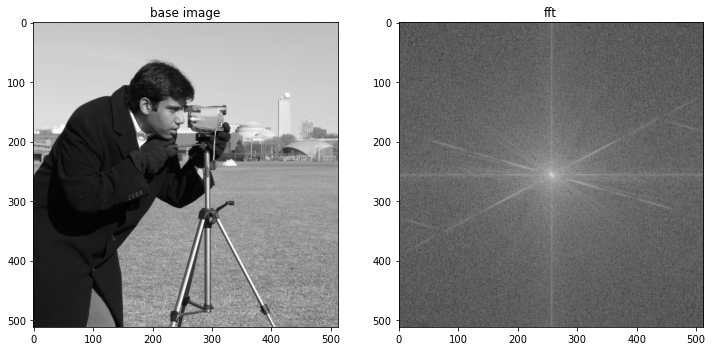

In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 6
# @Ahmet Galip Sengun - 904261
# November 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image
camera = skimage.data.camera()

dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(camera))

fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(camera, cmap = "gray")
ax[0].set_title("base image")
ax[1].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
ax[1].set_title("fft")


Text(0.5, 1.0, 'masked transform')

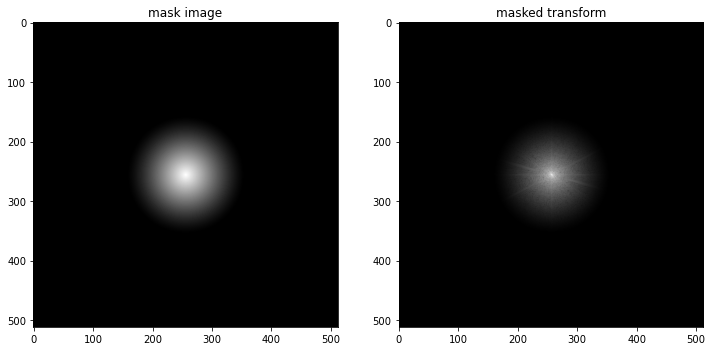

In [2]:
from skimage.filters import rank
from skimage.morphology import disk

black = np.zeros(camera.shape, dtype = np.uint8)
rr, cc = skimage.draw.disk((camera.shape[0]//2, camera.shape[1]//2), 50)
black[rr, cc] = 255

footprint = disk(50)
result = rank.mean(black, footprint=footprint)

fig, ax = plt.subplots(1, 2, figsize = (12,8))

ax[0].imshow(result, cmap ="gray")
ax[0].set_title("mask image")

ax[1].imshow(result * np.log(abs(dark_image_grey_fourier)), cmap ="gray")
ax[1].set_title("masked transform")


Text(0.5, 1.0, 'smoothed')

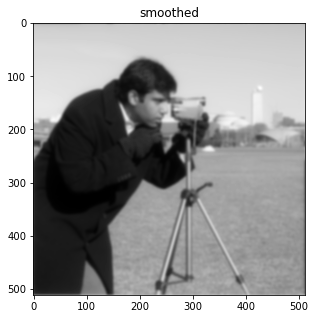

In [3]:
masked_smooth = dark_image_grey_fourier * result
fig = plt.figure(figsize=(5,5))
smooth = abs(np.fft.ifft2(masked_smooth))
plt.imshow(smooth, cmap ="gray")
plt.title("smoothed")

Text(0.5, 1.0, 'masked transform')

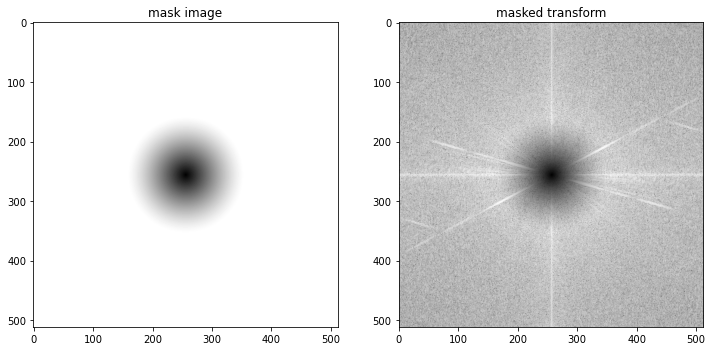

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (12,8))

ax[0].imshow(np.invert(result), cmap ="gray")
ax[0].set_title("mask image")

ax[1].imshow(np.invert(result) * np.log(abs(dark_image_grey_fourier)), cmap ="gray")
ax[1].set_title("masked transform")

Text(0.5, 1.0, 'edge detection')

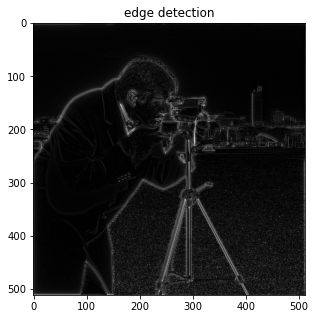

In [5]:
masked_edges = dark_image_grey_fourier * np.invert(result)
fig = plt.figure(figsize=(5,5))
plt.imshow(abs(np.fft.ifft2(masked_edges)), cmap ="gray")
plt.title("edge detection")

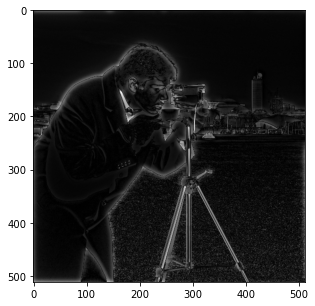

In [6]:
def smooth(img, size, method):
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(img))
    
    black = np.zeros(camera.shape, dtype = np.uint8)
    rr, cc = skimage.draw.disk((camera.shape[0]//2, camera.shape[1]//2), size)
    black[rr, cc] = 255

    footprint = disk(size)
    result = rank.mean(black, footprint=footprint)
    
    if method == "smooth":
        masked = dark_image_grey_fourier * result
    elif method == "edges":
        masked = dark_image_grey_fourier * np.invert(result)
    elif method == "sharpen":
        masked = dark_image_grey_fourier 
    fig = plt.figure(figsize=(5,5))
    return abs(np.fft.ifft2(masked))

plt.imshow(smooth(camera, 20, "edges"), cmap ="gray")

# Task 2

Text(0.5, 1.0, 'fft')

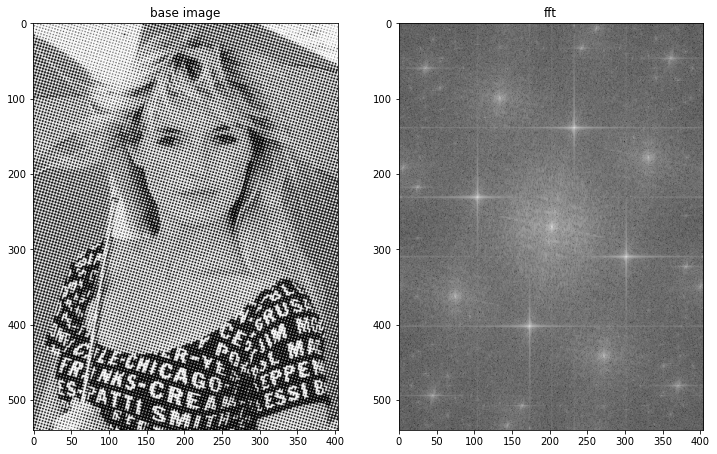

In [7]:
# Load image
gray1 = skimage.io.imread("gray1.jpg")

gray1_fourier = np.fft.fftshift(np.fft.fft2(gray1))

fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(gray1, cmap = "gray")
ax[0].set_title("base image")
ax[1].imshow(np.log(abs(gray1_fourier)), cmap='gray')
ax[1].set_title("fft")

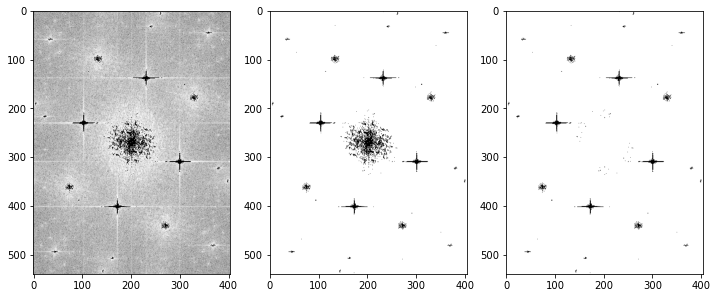

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (12,8))

fou = np.log(abs(gray1_fourier))
norm = (fou - np.min(fou)) / (np.max(fou) - np.min(fou))*255
norm[norm > 150] = 0
mask = norm == 0

black = np.zeros(gray1.shape, dtype = np.uint8)
rr, cc = skimage.draw.disk((gray1.shape[0]//2, gray1.shape[1]//2), 50)
black[rr, cc] = 255

ax[0].imshow(norm, cmap="gray")
ax[1].imshow(np.invert(mask), cmap="gray")
final_mask = mask * np.invert(black)
ax[2].imshow(np.invert(final_mask), cmap="gray")


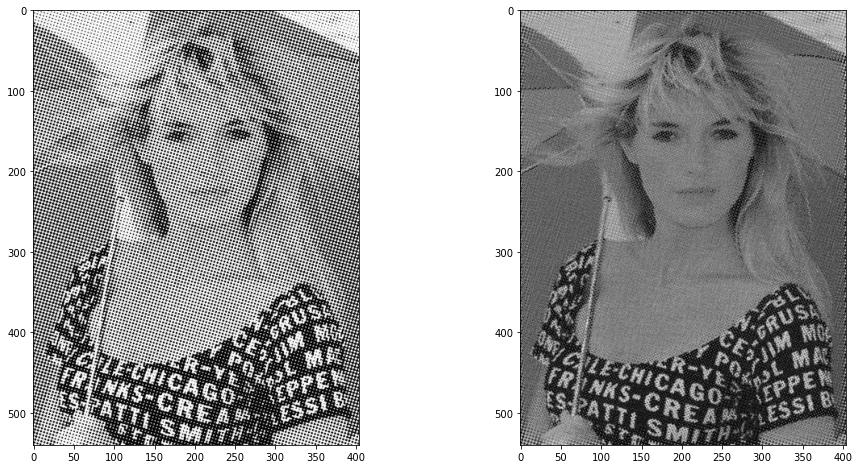

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (16,8))
ax[0].imshow(gray1, cmap = "gray")

masked = abs(np.fft.ifft2(gray1_fourier * np.invert(final_mask)))
ax[1].imshow((masked), cmap="gray")

Text(0.5, 1.0, 'fft')

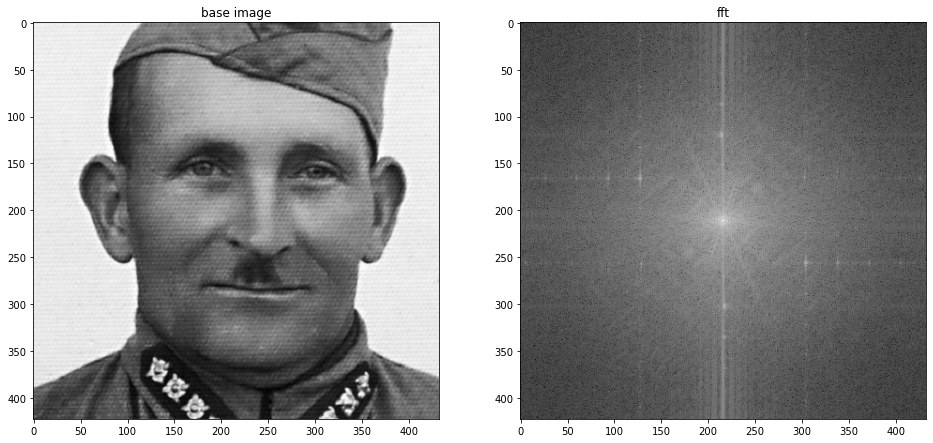

In [10]:
from skimage.color import rgb2gray
soldier = skimage.io.imread("soldier.png")
soldier = rgb2gray(soldier)

soldier_fourier = np.fft.fftshift(np.fft.fft2(soldier))
fig, ax = plt.subplots(1, 2, figsize = (16,8))
ax[0].imshow(soldier, cmap = "gray")
ax[0].set_title("base image")
ax[1].imshow(np.log(abs(soldier_fourier)), cmap='gray')
ax[1].set_title("fft")

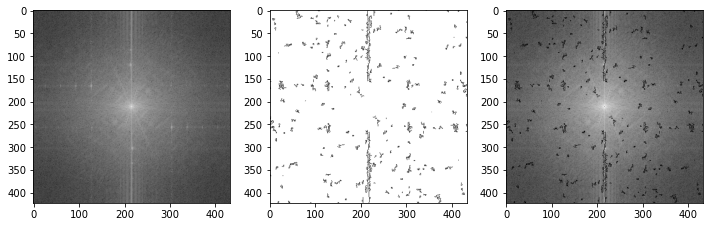

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (12,8))

fou = np.log(abs(soldier_fourier))
norm = (fou - np.min(fou)) / (np.max(fou) - np.min(fou))*255

im = np.log(abs(soldier_fourier))
norm = ((im - np.min(im)) / (np.max(im) - np.min(im))*255).astype(np.uint8)
edges = cv2.Canny(norm,60,180)
mask = edges == 255

black = np.zeros(soldier.shape, dtype = np.uint8)
rr, cc = skimage.draw.disk((soldier.shape[0]//2, soldier.shape[1]//2), 25)
black[rr, cc] = 255

ax[0].imshow(norm, cmap="gray")
final_mask = mask * np.invert(black)
ax[1].imshow(np.invert(final_mask), cmap="gray")
ax[2].imshow(np.invert(norm) * np.invert(final_mask), cmap="gray")


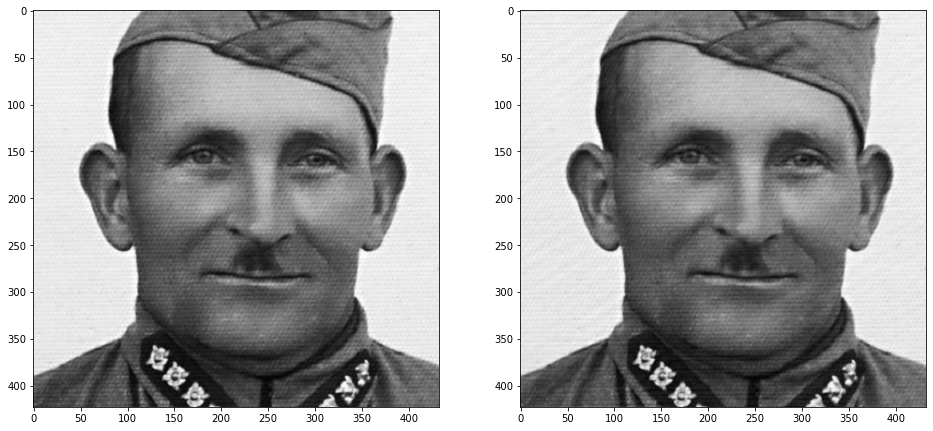

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (16,8))
ax[0].imshow(soldier, cmap = "gray")

masked = abs(np.fft.ifft2(soldier_fourier * np.invert(final_mask)))
ax[1].imshow((masked), cmap="gray")